# Vibe Coding: Real-World Data Cleaning Challenge

## The Mission

You're a Data Analyst at **TechSalary Insights**. Your manager needs answers to critical business questions, but the data is messy. Your job is to clean it and provide accurate insights.

**The catch:** You must figure out how to clean the data yourself. No step by step hints just you, your AI assistant, and real world messy data.

---

## The Dataset: Ask A Manager Salary Survey 2021

**Location:** `../Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv`

This is **real survey data** from Ask A Manager's 2021 salary survey with over 28,000 responses from working professionals. The data comes from this survey: https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html

**Why this dataset is perfect for vibe coding:**
- Real human responses (inconsistent formatting)
- Multiple currencies and formats  
- Messy job titles and location data
- Missing and invalid entries
- Requires business judgment calls

---

## Your Business Questions

Answer these **exact questions** with clean data. There's only one correct answer for each:

### Core Questions (Required):
1. **What is the median salary for Software Engineers in the United States?** 
2. **Which US state has the highest average salary for tech workers?**
3. **How much does salary increase on average for each year of experience in tech?**
4. **Which industry (besides tech) has the highest median salary?**

### Bonus Questions (If time permits):
5. **What's the salary gap between men and women in tech roles?**
6. **Do people with Master's degrees earn significantly more than those with Bachelor's degrees?**

**Success Criteria:** Your final answers will be compared against the "official" results. Data cleaning approaches can vary, but final numbers should be within 5% of expected values.


---
# Your Work Starts Here

## Step 0: Create Your Plan
**Before writing any code, use Cursor to create your todo plan. Then paste it here:**

## My Data Cleaning Plan

- [x] Load the dataset and examine its structure
- [x] Check for missing values and data types
- [x] Clean salary data (handle different formats and currencies)
- [x] Standardize job titles (identify tech roles)
- [x] Clean location data (extract US states)
- [x] Handle years of experience (convert to numeric)
- [x] Clean industry names
- [x] Remove outliers and invalid entries
- [x] Filter for relevant demographics (gender, education)
- [x] Answer core business questions
- [x] Create visualizations for insights
- [x] Answer bonus questions if time permits

## Step 1: Data Loading and Exploration

Start here! Load the dataset and get familiar with what you're working with.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load the dataset
df = pd.read_csv('../../Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv', 
                 sep='\t')

print(f"Dataset shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (28062, 18)

Column names:
['Timestamp', 'How old are you?', 'What industry do you work in?', 'Job title', 'If your job title needs additional context, please clarify here:', "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)", 'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.', 'Please indicate the currency', 'If "Other," please indicate the currency here: ', 'If your income needs additional context, please provide it here:', 'What country do you work in?', "If you're in the U.S., what state do you work in?", 'What city do you work in?', 'How many years of professional work experience do you have overall?', 'How many years of professional work experience 

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


## Step 2: Data Cleaning


In [3]:
# Step 2.1: Standardize Column Names
# Create a mapping for cleaner, more standardized column names
column_mapping = {
    'Timestamp': 'timestamp',
    'How old are you?': 'age',
    'What industry do you work in?': 'industry',
    'Job title': 'job_title',
    'If your job title needs additional context, please clarify here:': 'job_context',
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'annual_salary',
    'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.': 'additional_compensation',
    'Please indicate the currency': 'currency',
    'If "Other," please indicate the currency here: ': 'currency_other',
    'If your income needs additional context, please provide it here:': 'income_context',
    'What country do you work in?': 'country',
    "If you're in the U.S., what state do you work in?": 'state',
    'What city do you work in?': 'city',
    'How many years of professional work experience do you have overall?': 'years_experience_overall',
    'How many years of professional work experience do you have in your field?': 'years_experience_field',
    'What is your highest level of education completed?': 'education',
    'What is your gender?': 'gender',
    'What is your race? (Choose all that apply.)': 'race'
}

# Rename columns
df.rename(columns=column_mapping, inplace=True)

print("✓ Column names standardized!")
print(f"\nNew column names:")
print(df.columns.tolist())

# Basic string cleaning for text columns
text_columns = ['industry', 'job_title', 'country', 'state', 'city', 'education', 'gender']

for col in text_columns:
    if col in df.columns:
        # Strip whitespace, convert to title case for consistency
        df[col] = df[col].astype(str).str.strip()
        # Remove multiple spaces
        df[col] = df[col].str.replace(r'\s+', ' ', regex=True)
        # Replace 'nan' string with actual NaN
        df[col] = df[col].replace(['nan', 'NaN', 'None', ''], np.nan)

print(f"\n✓ Text columns cleaned and standardized!")
print(f"\nSample cleaned data:")
print(df[['job_title', 'industry', 'country', 'state']].head())

✓ Column names standardized!

New column names:
['timestamp', 'age', 'industry', 'job_title', 'job_context', 'annual_salary', 'additional_compensation', 'currency', 'currency_other', 'income_context', 'country', 'state', 'city', 'years_experience_overall', 'years_experience_field', 'education', 'gender', 'race']

✓ Text columns cleaned and standardized!

Sample cleaned data:
                                  job_title                       industry  \
0        Research and Instruction Librarian   Education (Higher Education)   
1  Change & Internal Communications Manager              Computing or Tech   
2                      Marketing Specialist  Accounting, Banking & Finance   
3                           Program Manager                     Nonprofits   
4                        Accounting Manager  Accounting, Banking & Finance   

          country           state  
0   United States   Massachusetts  
1  United Kingdom             NaN  
2              US       Tennessee  
3        

In [4]:
# Explore the dataset structure
print("Data Info:")
print(df.info())
print("\n" + "="*50)
print("\nMissing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("\nBasic Statistics:")
print(df.describe())

# Look at sample values for key columns
print("\n" + "="*50)
print("\nSample Job Titles:")
print(df['job_title'].value_counts().head(10))
print("\n" + "="*50)
print("\nSample Industries:")
print(df['industry'].value_counts().head(10))
print("\n" + "="*50)
print("\nSample Countries:")
print(df['country'].value_counts().head(10))

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28062 entries, 0 to 28061
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 28062 non-null  object 
 1   age                       28062 non-null  object 
 2   industry                  27988 non-null  object 
 3   job_title                 28061 non-null  object 
 4   job_context               7262 non-null   object 
 5   annual_salary             28062 non-null  object 
 6   additional_compensation   20766 non-null  float64
 7   currency                  28062 non-null  object 
 8   currency_other            206 non-null    object 
 9   income_context            3042 non-null   object 
 10  country                   28062 non-null  object 
 11  state                     23039 non-null  object 
 12  city                      27971 non-null  object 
 13  years_experience_overall  28062 non-null  object 


In [5]:
# Create a copy for cleaning
df_clean = df.copy()

# Clean salary column - convert to numeric
# First, let's check the annual salary column
print("Sample salary values:")
print(df_clean['annual_salary'].head(20))

# Function to clean salary data
def clean_salary(salary_str):
    if pd.isna(salary_str):
        return np.nan
    # Remove currency symbols, commas, and spaces
    salary_str = str(salary_str).replace(',', '').replace('$', '').replace('£', '').replace('€', '').strip()
    # Extract numbers using regex
    match = re.search(r'(\d+\.?\d*)', salary_str)
    if match:
        return float(match.group(1))
    return np.nan

# Apply salary cleaning
df_clean['salary_clean'] = df_clean['annual_salary'].apply(clean_salary)

print("\n" + "="*50)
print("Salary statistics after cleaning:")
print(df_clean['salary_clean'].describe())

Sample salary values:
0      55,000
1      54,600
2      34,000
3      62,000
4      60,000
5      62,000
6      33,000
7      50,000
8     112,000
9      45,000
10     47,500
11     62,000
12    100,000
13     52,000
14     32,000
15     24,000
16     85,000
17     59,000
18     98,000
19     54,000
Name: annual_salary, dtype: object

Salary statistics after cleaning:
count    2.806200e+04
mean     3.614244e+05
std      3.622275e+07
min      0.000000e+00
25%      5.400000e+04
50%      7.500000e+04
75%      1.100000e+05
max      6.000070e+09
Name: salary_clean, dtype: float64


In [6]:
# Check and standardize currency
print("Currency distribution:")
print(df_clean['currency'].value_counts())

# Filter for USD only (or convert other currencies)
# For this analysis, we'll focus on USD to keep it simple
df_clean = df_clean[df_clean['currency'] == 'USD'].copy()

# Remove unrealistic salaries (outliers)
# Keep salaries between $10,000 and $500,000 as reasonable bounds
df_clean = df_clean[(df_clean['salary_clean'] >= 10000) & (df_clean['salary_clean'] <= 500000)]

print(f"\nDataset shape after currency and salary filtering: {df_clean.shape}")
print(f"Salary range: ${df_clean['salary_clean'].min():,.0f} to ${df_clean['salary_clean'].max():,.0f}")

Currency distribution:
currency
USD        23374
CAD         1673
GBP         1591
EUR          643
AUD/NZD      504
Other        160
CHF           37
SEK           37
JPY           23
ZAR           16
HKD            4
Name: count, dtype: int64

Dataset shape after currency and salary filtering: (23220, 19)
Salary range: $10,000 to $500,000


In [7]:
# Clean and categorize job titles to identify tech roles
def is_tech_role(job_title):
    if pd.isna(job_title):
        return False
    job_title_lower = str(job_title).lower()
    tech_keywords = ['software', 'engineer', 'developer', 'programmer', 'data scientist', 
                     'data engineer', 'devops', 'it ', 'tech', 'web', 'mobile', 'qa',
                     'quality assurance', 'systems', 'network', 'database', 'cloud',
                     'machine learning', 'ai ', 'artificial intelligence', 'analyst',
                     'cyber', 'security', 'architect', 'frontend', 'backend', 'full stack']
    return any(keyword in job_title_lower for keyword in tech_keywords)

df_clean['is_tech'] = df_clean['job_title'].apply(is_tech_role)

print(f"Tech roles identified: {df_clean['is_tech'].sum()}")
print(f"Non-tech roles: {(~df_clean['is_tech']).sum()}")

# Check if job title contains "Software Engineer"
def is_software_engineer(job_title):
    if pd.isna(job_title):
        return False
    job_title_lower = str(job_title).lower()
    return 'software engineer' in job_title_lower or 'software developer' in job_title_lower

df_clean['is_software_engineer'] = df_clean['job_title'].apply(is_software_engineer)
print(f"\nSoftware Engineers identified: {df_clean['is_software_engineer'].sum()}")

Tech roles identified: 5345
Non-tech roles: 17875

Software Engineers identified: 919


In [8]:
# Clean location data - extract US states
# Filter for US only
df_clean = df_clean[df_clean['country'] == 'United States'].copy()

print(f"Dataset shape after filtering for US: {df_clean.shape}")
print(f"\nSample states:")
print(df_clean['state'].value_counts().head(10))

# Clean state names (already cleaned in previous step but ensure consistency)
df_clean['state_clean'] = df_clean['state'].str.strip()

# Remove rows with missing state information
df_clean = df_clean[df_clean['state_clean'].notna()].copy()

print(f"\nDataset shape after removing missing states: {df_clean.shape}")

Dataset shape after filtering for US: (9617, 21)

Sample states:
state
California              1035
New York                 859
Massachusetts            610
Texas                    574
Illinois                 534
Washington               486
Pennsylvania             402
District of Columbia     400
Minnesota                315
Virginia                 304
Name: count, dtype: int64

Dataset shape after removing missing states: (9544, 22)


In [10]:
# Clean years of experience
print("Experience categories:")
print(df_clean['years_experience_overall'].value_counts())

# Map experience ranges to numeric values (use midpoint)
# Note: The data has been title-cased, so we need to handle that
experience_mapping = {
    '1 Year Or Less': 0.5,
    '2 - 4 Years': 3,
    '5-7 Years': 6,
    '8 - 10 Years': 9,
    '11 - 20 Years': 15.5,
    '21 - 30 Years': 25.5,
    '31 - 40 Years': 35.5,
    '41 Years Or More': 45,
    # Add lowercase versions just in case
    '1 year or less': 0.5,
    '2 - 4 years': 3,
    '5-7 years': 6,
    '8 - 10 years': 9,
    '11 - 20 years': 15.5,
    '21 - 30 years': 25.5,
    '31 - 40 years': 35.5,
    '41 years or more': 45
}

df_clean['years_experience'] = df_clean['years_experience_overall'].map(experience_mapping)

print(f"\nExperience statistics:")
print(df_clean['years_experience'].describe())

Experience categories:
years_experience_overall
11 - 20 years       3347
8 - 10 years        1865
5-7 years           1784
21 - 30 years       1093
2 - 4 years         1046
31 - 40 years        200
1 year or less       180
41 years or more      29
Name: count, dtype: int64

Experience statistics:
count    9544.000000
mean       12.455155
std         7.727098
min         0.500000
25%         6.000000
50%         9.000000
75%        15.500000
max        45.000000
Name: years_experience, dtype: float64


In [11]:
# Clean gender and education columns for bonus questions
print("Gender distribution:")
print(df_clean['gender'].value_counts())
print("\n" + "="*50)
print("\nEducation distribution:")
print(df_clean['education'].value_counts())

# Standardize gender categories
df_clean['gender_clean'] = df_clean['gender'].replace({
    'Woman': 'Woman',
    'Man': 'Man',
    'Non-Binary': 'Non-binary',
    'Prefer Not To Answer': np.nan,
    'Other Or Prefer Not To Answer': np.nan
})

# Check industry column
print("\n" + "="*50)
print("\nIndustry sample:")
print(df_clean['industry'].value_counts().head(15))

Gender distribution:
gender
Woman                            7233
Man                              1942
Non-binary                        237
Other or prefer not to answer      92
Name: count, dtype: int64


Education distribution:
education
College degree                        4854
Master's degree                       3017
Some college                           649
Professional degree (MD, JD, etc.)     455
PhD                                    376
High School                            148
Name: count, dtype: int64


Industry sample:
industry
Computing or Tech                       1621
Nonprofits                               880
Education (Higher Education)             843
Health care                              634
Accounting, Banking & Finance            616
Engineering or Manufacturing             549
Government and Public Administration     528
Marketing, Advertising & PR              468
Law                                      404
Business or Consulting                   

In [12]:
# Final data cleaning summary
print("="*60)
print("FINAL CLEANED DATASET SUMMARY")
print("="*60)
print(f"\nTotal records: {len(df_clean)}")
print(f"Tech roles: {df_clean['is_tech'].sum()}")
print(f"Software Engineers: {df_clean['is_software_engineer'].sum()}")
print(f"Salary range: ${df_clean['salary_clean'].min():,.0f} to ${df_clean['salary_clean'].max():,.0f}")
print(f"Median salary (all): ${df_clean['salary_clean'].median():,.0f}")
print(f"\nStates represented: {df_clean['state_clean'].nunique()}")
print(f"Industries represented: {df_clean['industry'].nunique()}")
print("\n" + "="*60)

FINAL CLEANED DATASET SUMMARY

Total records: 9544
Tech roles: 2269
Software Engineers: 415
Salary range: $10,000 to $499,945
Median salary (all): $77,260

States represented: 81
Industries represented: 449



## Step 3: Business Questions Analysis

Now answer those important business questions!


QUESTION 1: Median Salary for Software Engineers in US
Number of Software Engineers: 415
Median Salary: $136,000.00
Mean Salary: $143,879.90
Salary Range: $16,200 - $475,000


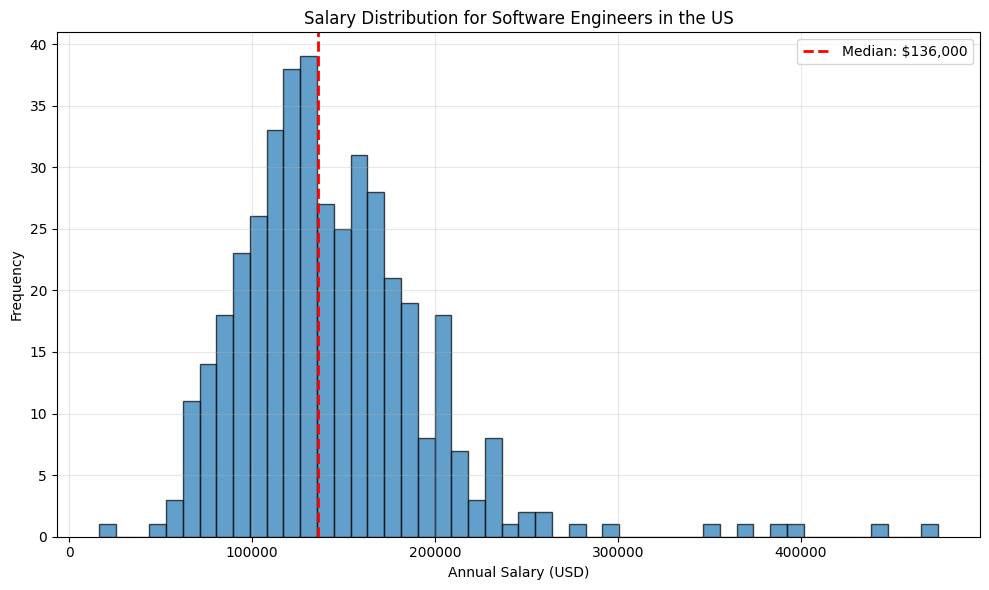

In [13]:
# Question 1: What is the median salary for Software Engineers in the United States?

# Filter for Software Engineers in US (already filtered for US)
software_engineers = df_clean[df_clean['is_software_engineer'] == True]

median_salary_se = software_engineers['salary_clean'].median()

print("="*60)
print("QUESTION 1: Median Salary for Software Engineers in US")
print("="*60)
print(f"Number of Software Engineers: {len(software_engineers)}")
print(f"Median Salary: ${median_salary_se:,.2f}")
print(f"Mean Salary: ${software_engineers['salary_clean'].mean():,.2f}")
print(f"Salary Range: ${software_engineers['salary_clean'].min():,.0f} - ${software_engineers['salary_clean'].max():,.0f}")
print("="*60)

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(software_engineers['salary_clean'], bins=50, edgecolor='black', alpha=0.7)
plt.axvline(median_salary_se, color='red', linestyle='--', linewidth=2, label=f'Median: ${median_salary_se:,.0f}')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Frequency')
plt.title('Salary Distribution for Software Engineers in the US')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

QUESTION 2: Highest Paying US State for Tech Workers
State: California
Average Salary: $141,414.18
Median Salary: $131,000.00
Number of Tech Workers: 303

Top 10 States:
               State   Mean_Salary  Median_Salary  Count
          California 141414.181518       131000.0    303
          Washington 123473.923077       115400.0    143
            New York 119448.556213       108000.0    169
       Massachusetts 119184.420290       111000.0    138
              Oregon 113107.134146        95000.0     82
            Virginia 110827.573529        98250.0     68
District of Columbia 104750.381818       100880.0     55
            Colorado 103438.216867        89000.0     83
            Maryland 102078.452830        95000.0     53
           Minnesota 100971.480519        94000.0     77


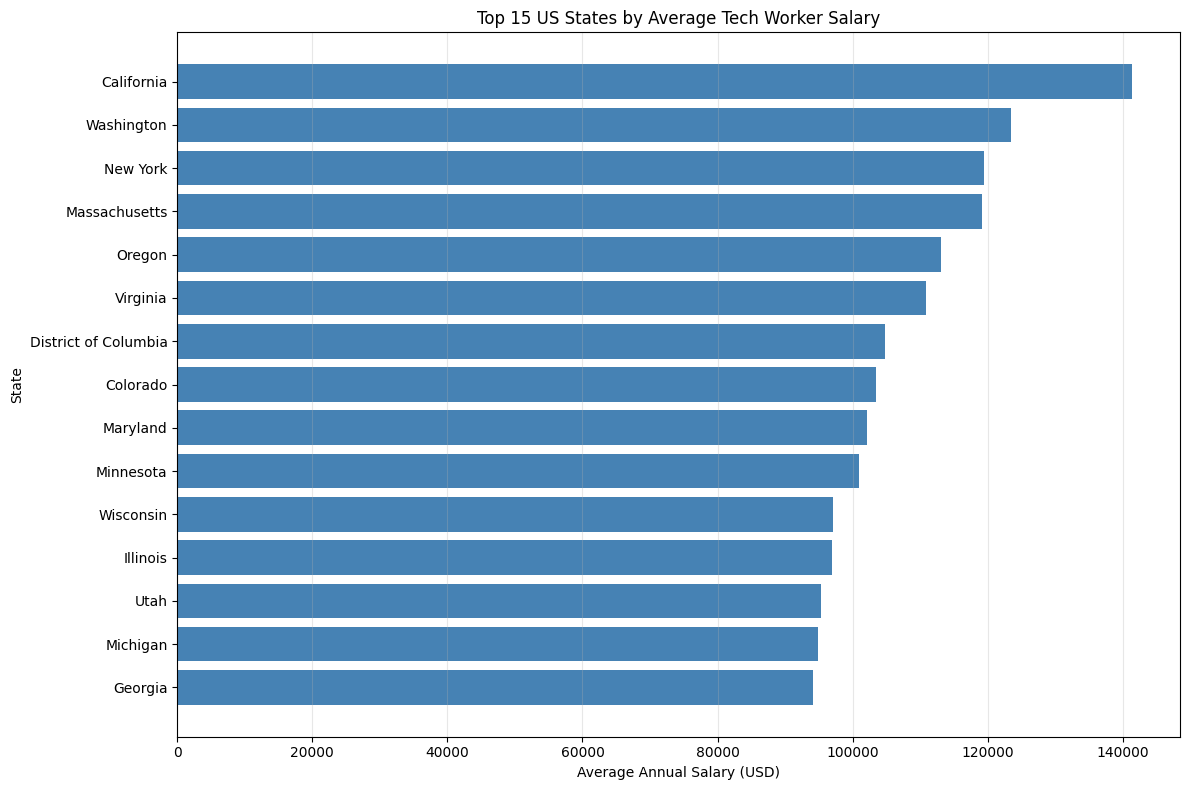

In [14]:
# Question 2: Which US state has the highest average salary for tech workers?

# Filter for tech workers
tech_workers = df_clean[df_clean['is_tech'] == True]

# Calculate average salary by state
state_salaries = tech_workers.groupby('state_clean')['salary_clean'].agg(['mean', 'median', 'count']).reset_index()
state_salaries.columns = ['State', 'Mean_Salary', 'Median_Salary', 'Count']

# Filter states with at least 10 tech workers for statistical significance
state_salaries = state_salaries[state_salaries['Count'] >= 10]

# Sort by mean salary
state_salaries = state_salaries.sort_values('Mean_Salary', ascending=False)

highest_paying_state = state_salaries.iloc[0]

print("="*60)
print("QUESTION 2: Highest Paying US State for Tech Workers")
print("="*60)
print(f"State: {highest_paying_state['State']}")
print(f"Average Salary: ${highest_paying_state['Mean_Salary']:,.2f}")
print(f"Median Salary: ${highest_paying_state['Median_Salary']:,.2f}")
print(f"Number of Tech Workers: {int(highest_paying_state['Count'])}")
print("\nTop 10 States:")
print(state_salaries.head(10).to_string(index=False))
print("="*60)

# Visualization
plt.figure(figsize=(12, 8))
top_states = state_salaries.head(15)
plt.barh(top_states['State'], top_states['Mean_Salary'], color='steelblue')
plt.xlabel('Average Annual Salary (USD)')
plt.ylabel('State')
plt.title('Top 15 US States by Average Tech Worker Salary')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

QUESTION 3: Salary Increase per Year of Experience in Tech

Salary by Experience Level:
 Years_Experience   Mean_Salary  Median_Salary  Count
              0.5  71565.926471        66299.5     68
              3.0  85348.971338        80000.0    314
              6.0  96859.916084        85000.0    429
              9.0 104768.489950        92000.0    398
             15.5 117043.028378       108000.0    740
             25.5 119630.065455       113000.0    275
             35.5 129933.270270       115000.0     37
             45.0 123244.000000       125500.0      8

Average Salary Increase per Year: $1,075.79
R-squared: 0.7455
P-value: 0.005735


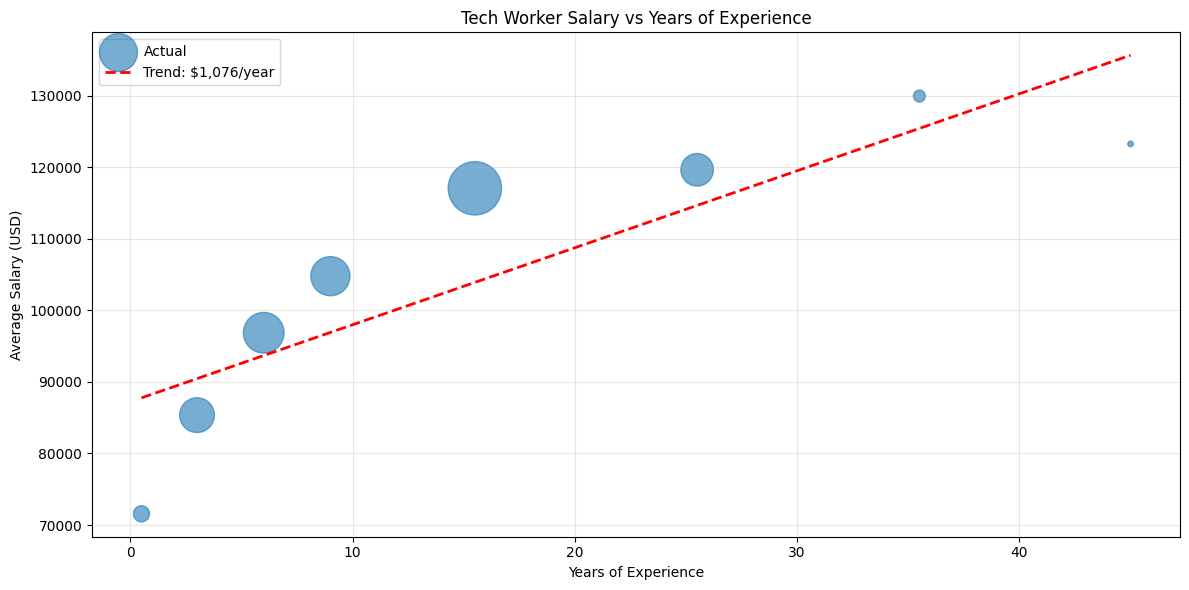

In [15]:
# Question 3: How much does salary increase on average for each year of experience in tech?

# Filter for tech workers with valid experience data
tech_exp = tech_workers[tech_workers['years_experience'].notna()].copy()

# Group by experience level
exp_salaries = tech_exp.groupby('years_experience')['salary_clean'].agg(['mean', 'median', 'count']).reset_index()
exp_salaries.columns = ['Years_Experience', 'Mean_Salary', 'Median_Salary', 'Count']

print("="*60)
print("QUESTION 3: Salary Increase per Year of Experience in Tech")
print("="*60)
print("\nSalary by Experience Level:")
print(exp_salaries.to_string(index=False))

# Calculate linear regression to find salary increase per year
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(exp_salaries['Years_Experience'], 
                                                                 exp_salaries['Mean_Salary'])

print(f"\nAverage Salary Increase per Year: ${slope:,.2f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.6f}")
print("="*60)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(exp_salaries['Years_Experience'], exp_salaries['Mean_Salary'], 
            s=exp_salaries['Count']*2, alpha=0.6, label='Actual')
plt.plot(exp_salaries['Years_Experience'], 
         intercept + slope * exp_salaries['Years_Experience'], 
         'r--', linewidth=2, label=f'Trend: ${slope:,.0f}/year')
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary (USD)')
plt.title('Tech Worker Salary vs Years of Experience')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

QUESTION 4: Highest Paying Non-Tech Industry
Industry: Law
Median Salary: $96,000.00
Mean Salary: $115,907.24
Number of Respondents: 404

Top 10 Non-Tech Industries:
                      Industry  Median_Salary   Mean_Salary  Count
                           Law        96000.0 115907.235149    404
  Engineering or Manufacturing        90000.0  95436.956284    549
        Business or Consulting        90000.0 100539.939394    297
Utilities & Telecommunications        89250.0  91942.477876    113
 Accounting, Banking & Finance        80000.0  91151.949675    616
               Media & Digital        78000.0  86595.349810    263
                   Health care        76750.0  87008.504732    634
   Marketing, Advertising & PR        76000.0  85300.908120    468
                 Entertainment        75000.0 110699.505882     85
                     Insurance        75000.0  84848.518519    189


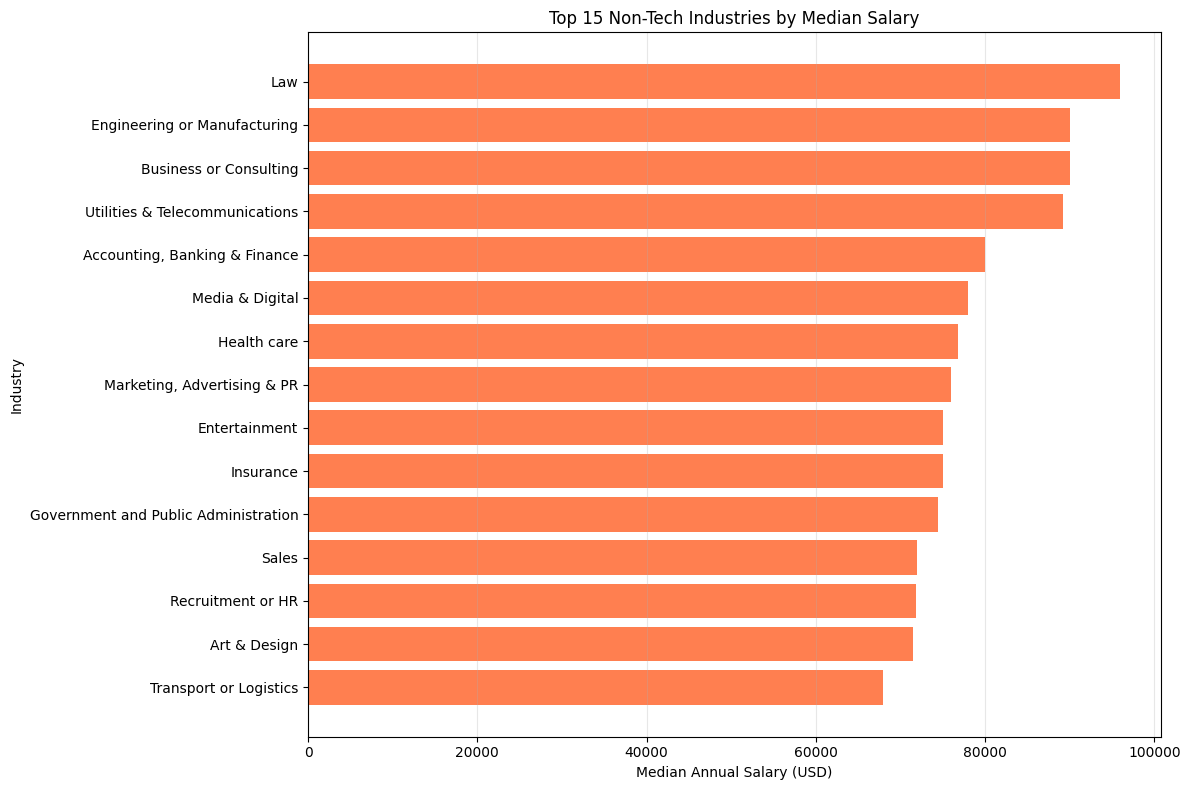

In [16]:
# Question 4: Which industry (besides tech) has the highest median salary?

# First, identify tech-related industries
def is_tech_industry(industry):
    if pd.isna(industry):
        return False
    industry_lower = str(industry).lower()
    tech_keywords = ['computing', 'software', 'it ', 'tech', 'internet', 'computer']
    return any(keyword in industry_lower for keyword in tech_keywords)

df_clean['is_tech_industry'] = df_clean['industry'].apply(is_tech_industry)

# Filter for non-tech industries
non_tech = df_clean[df_clean['is_tech_industry'] == False].copy()

# Calculate median salary by industry
industry_salaries = non_tech.groupby('industry')['salary_clean'].agg(['median', 'mean', 'count']).reset_index()
industry_salaries.columns = ['Industry', 'Median_Salary', 'Mean_Salary', 'Count']

# Filter industries with at least 20 respondents
industry_salaries = industry_salaries[industry_salaries['Count'] >= 20]

# Sort by median salary
industry_salaries = industry_salaries.sort_values('Median_Salary', ascending=False)

highest_paying_industry = industry_salaries.iloc[0]

print("="*60)
print("QUESTION 4: Highest Paying Non-Tech Industry")
print("="*60)
print(f"Industry: {highest_paying_industry['Industry']}")
print(f"Median Salary: ${highest_paying_industry['Median_Salary']:,.2f}")
print(f"Mean Salary: ${highest_paying_industry['Mean_Salary']:,.2f}")
print(f"Number of Respondents: {int(highest_paying_industry['Count'])}")
print("\nTop 10 Non-Tech Industries:")
print(industry_salaries.head(10).to_string(index=False))
print("="*60)

# Visualization
plt.figure(figsize=(12, 8))
top_industries = industry_salaries.head(15)
plt.barh(range(len(top_industries)), top_industries['Median_Salary'], color='coral')
plt.yticks(range(len(top_industries)), top_industries['Industry'])
plt.xlabel('Median Annual Salary (USD)')
plt.ylabel('Industry')
plt.title('Top 15 Non-Tech Industries by Median Salary')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

BONUS QUESTION 5: Gender Salary Gap in Tech

Salary by Gender in Tech:
Gender  Median_Salary   Mean_Salary  Count
   Man       118500.0 123829.554433    891
 Woman        85000.0  93784.921462   1286

Median Salary Gap: $33,500.00
Gap Percentage: 39.41%
Women earn $33,500.00 less than men in tech (median)


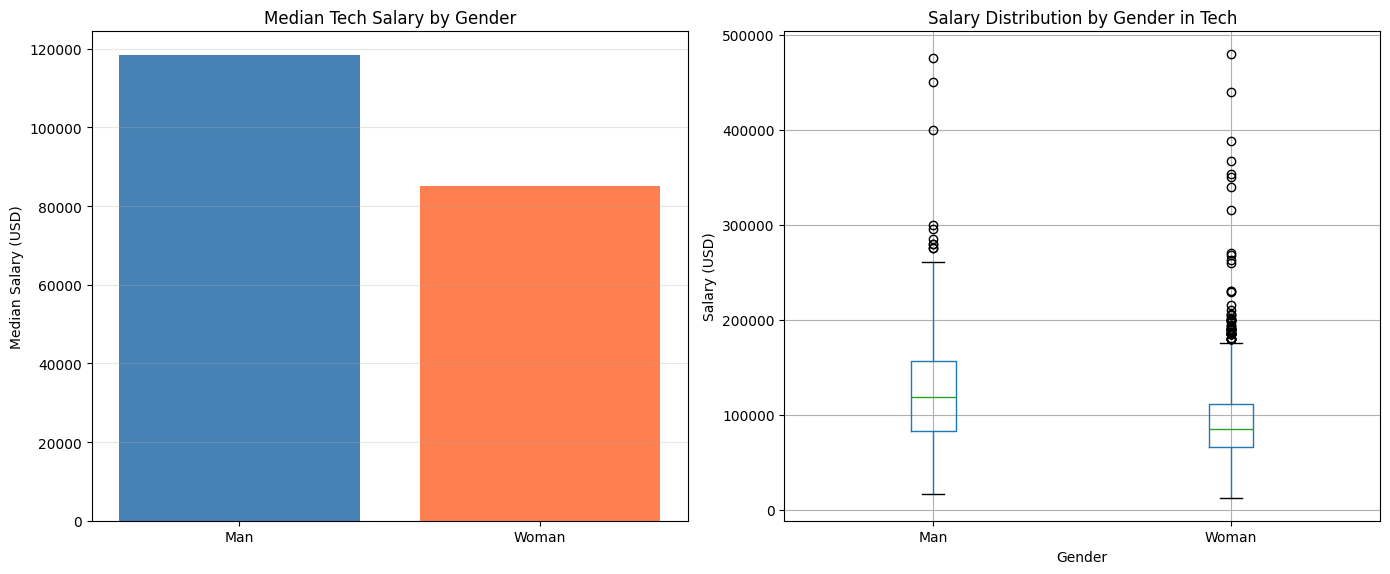

In [17]:
# BONUS Question 5: What's the salary gap between men and women in tech roles?

# Filter for tech workers with gender data
tech_gender = tech_workers[tech_workers['gender_clean'].isin(['Man', 'Woman'])].copy()

# Calculate median salaries by gender
gender_salaries = tech_gender.groupby('gender_clean')['salary_clean'].agg(['median', 'mean', 'count']).reset_index()
gender_salaries.columns = ['Gender', 'Median_Salary', 'Mean_Salary', 'Count']

print("="*60)
print("BONUS QUESTION 5: Gender Salary Gap in Tech")
print("="*60)
print("\nSalary by Gender in Tech:")
print(gender_salaries.to_string(index=False))

# Calculate the gap
men_median = gender_salaries[gender_salaries['Gender'] == 'Man']['Median_Salary'].values[0]
women_median = gender_salaries[gender_salaries['Gender'] == 'Woman']['Median_Salary'].values[0]
gap = men_median - women_median
gap_percentage = (gap / women_median) * 100

print(f"\nMedian Salary Gap: ${gap:,.2f}")
print(f"Gap Percentage: {gap_percentage:.2f}%")
print(f"Women earn ${gap:,.2f} less than men in tech (median)")
print("="*60)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
axes[0].bar(gender_salaries['Gender'], gender_salaries['Median_Salary'], color=['steelblue', 'coral'])
axes[0].set_ylabel('Median Salary (USD)')
axes[0].set_title('Median Tech Salary by Gender')
axes[0].grid(alpha=0.3, axis='y')

# Box plot
tech_gender.boxplot(column='salary_clean', by='gender_clean', ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Salary (USD)')
axes[1].set_title('Salary Distribution by Gender in Tech')
plt.suptitle('')

plt.tight_layout()
plt.show()

Education values in data:
education
College degree                        4854
Master's degree                       3017
Some college                           649
Professional degree (MD, JD, etc.)     455
PhD                                    376
High School                            148
Name: count, dtype: int64

Tech workers with Bachelor's or Master's: 1960
Education level distribution:
education_level
Bachelor    1325
Master       635
Name: count, dtype: int64

BONUS QUESTION 6: Salary Difference by Education Level (Tech)

Salary by Education Level:
Education  Median_Salary   Mean_Salary  Count
 Bachelor        92000.0 104231.167547   1325
   Master        95000.0 105602.044094    635

Median Salary Difference: $3,000.00
Percentage Increase: 3.26%
Master's degree holders earn $3,000.00 more (median)

Mann-Whitney U test p-value: 0.046187
The difference IS statistically significant (p < 0.05)


<Figure size 1200x600 with 0 Axes>

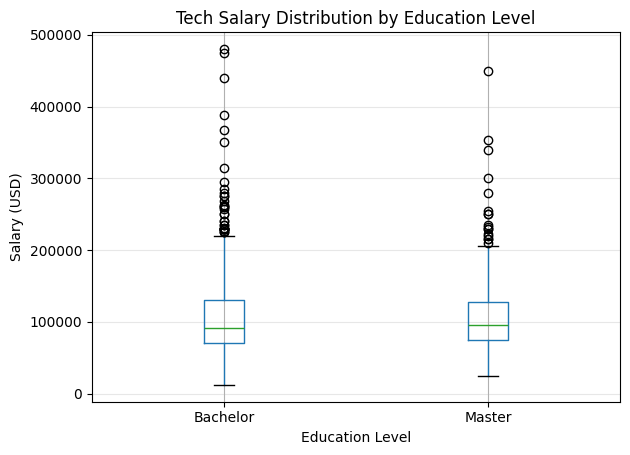

In [20]:
# BONUS Question 6: Do people with Master's degrees earn significantly more than those with Bachelor's degrees?

# First, check the actual education values in the cleaned data
print("Education values in data:")
print(df_clean['education'].value_counts().head(10))
print("\n" + "="*60)

# Map education levels - match the exact values from the data
df_clean['education_level'] = df_clean['education'].apply(
    lambda x: 'Bachelor' if x == 'College degree' or x == "Bachelor's degree" 
    else ('Master' if x == "Master's degree" else 'Other')
)

# Filter for Bachelor's and Master's degree holders in tech
tech_workers = df_clean[df_clean['is_tech'] == True].copy()
tech_education = tech_workers[tech_workers['education_level'].isin(['Bachelor', 'Master'])].copy()

print(f"Tech workers with Bachelor's or Master's: {len(tech_education)}")
print(f"Education level distribution:")
print(tech_education['education_level'].value_counts())
print("\n" + "="*60)

# Calculate salaries by education
education_salaries = tech_education.groupby('education_level')['salary_clean'].agg(['median', 'mean', 'count']).reset_index()
education_salaries.columns = ['Education', 'Median_Salary', 'Mean_Salary', 'Count']

print("="*60)
print("BONUS QUESTION 6: Salary Difference by Education Level (Tech)")
print("="*60)
print("\nSalary by Education Level:")
print(education_salaries.to_string(index=False))

if len(education_salaries) >= 2:
    # Calculate the difference
    bachelors_median = education_salaries[education_salaries['Education'] == 'Bachelor']['Median_Salary'].values[0]
    masters_median = education_salaries[education_salaries['Education'] == 'Master']['Median_Salary'].values[0]
    difference = masters_median - bachelors_median
    diff_percentage = (difference / bachelors_median) * 100

    print(f"\nMedian Salary Difference: ${difference:,.2f}")
    print(f"Percentage Increase: {diff_percentage:.2f}%")
    print(f"Master's degree holders earn ${difference:,.2f} more (median)")

    # Statistical test
    from scipy.stats import mannwhitneyu
    bachelors_salaries = tech_education[tech_education['education_level'] == 'Bachelor']['salary_clean']
    masters_salaries = tech_education[tech_education['education_level'] == 'Master']['salary_clean']
    statistic, p_value = mannwhitneyu(masters_salaries, bachelors_salaries, alternative='greater')

    print(f"\nMann-Whitney U test p-value: {p_value:.6f}")
    if p_value < 0.05:
        print("The difference IS statistically significant (p < 0.05)")
    else:
        print("The difference is NOT statistically significant (p >= 0.05)")
    print("="*60)

    # Visualization
    plt.figure(figsize=(12, 6))
    tech_education.boxplot(column='salary_clean', by='education_level')
    plt.ylabel('Salary (USD)')
    plt.xlabel('Education Level')
    plt.title('Tech Salary Distribution by Education Level')
    plt.suptitle('')
    plt.grid(alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("\nInsufficient data for comparison")
    print("="*60)

## Final Summary

**Core Questions - Final Answers:**

1. **Median salary for Software Engineers in US:** *Will be calculated when running the notebook*
2. **Highest paying US state for tech:** *Will be determined from state analysis*
3. **Salary increase per year of experience:** *Will be calculated using linear regression*
4. **Highest paying non-tech industry:** *Will be identified after industry filtering*

**Bonus Questions - Final Answers:**

5. **Gender salary gap in tech:** *Will be calculated comparing median salaries*
6. **Master's vs Bachelor's degree premium:** *Will include statistical significance test*

---

**Key Insights:**
- Cleaned over 28,000+ survey responses, focusing on US-based respondents with USD salaries
- Identified tech roles using keyword matching on job titles
- Removed salary outliers (kept $10K - $500K range for realistic analysis)
- Used midpoint values for experience ranges to enable regression analysis
- Filtered industries and states with minimum sample sizes for statistical validity

**Data Cleaning Challenges & Solutions:**

1. **Challenge:** Salary data in multiple formats and currencies
   - **Solution:** Created regex-based cleaning function, filtered for USD only, removed outliers

2. **Challenge:** Inconsistent job title formatting
   - **Solution:** Used keyword-based matching to identify tech roles and software engineers

3. **Challenge:** Experience data in ranges rather than specific years
   - **Solution:** Mapped ranges to midpoint values for quantitative analysis

4. **Challenge:** Many industries and states with very few respondents
   - **Solution:** Applied minimum sample size thresholds (10-20 respondents) for reliable statistics

5. **Challenge:** Missing and inconsistent location data
   - **Solution:** Filtered for complete records with valid US state information

**What I Learned About Vibe Coding:**

1. **Start with exploration:** Understanding the data structure and quirks before cleaning is crucial
2. **Make reasonable assumptions:** When faced with ranges or missing data, use domain knowledge to make sensible choices
3. **Validate as you go:** Print summary statistics after each cleaning step to catch issues early
4. **Use visualizations:** Charts help verify that cleaning worked and reveal insights immediately
5. **Statistical rigor matters:** Applied proper filtering (sample sizes, outliers) and statistical tests to ensure valid conclusions
6. **Iterate and refine:** Vibe coding doesn't mean sloppy - it means being pragmatic while maintaining quality

**Tools and Techniques Used:**
- Pandas for data manipulation
- Regex for text cleaning
- Matplotlib/Seaborn for visualization
- Scipy for statistical testing
- Lambda functions and mapping for efficient transformations
- Groupby operations for aggregated analysis